# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
#import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress

# Import API key
#api_keys = os.path.relpath(r"../Resources/api_keys.py")
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="https://nominatim.openstreetmap.org")

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# # Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# # Print the city count to confirm sufficient count
len(cities)

612

In [3]:
# #code to use a geopy loop to produce cities just to get started
# keys = ["village","town", "city_district", "city", "suburb"]
# for lat,lng in lat_lngs:
#     if len(cities) == 500:
#         break
#     location = geolocator.reverse(f"{lat},{lng}", language="en-US", timeout=None)  
#     if location != None:
#         addr = location.raw["address"]
#         #pprint.pprint(addr)
#         for key in keys:
#             #print(key)
#             if key in addr:
#                 #print(key)
#                 city = addr[key]
#                 #print(city)
#                 if city not in cities:
#                     cities.append(city)
#                 break

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#print(cities)
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

dict_keys = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]
weather = {}
City_ID = 0

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

counter = 0
# #loop to query cities
for place in cities:
    try:
        output = requests.get(query_url + place).json()
        print(f"Success: Progress {counter} of {len(cities)-1} | {City_ID},{output['name']}")
        city_pull = {"City": (output["name"]),
                 "Cloudiness": (output["clouds"]["all"]),
                 "Country": (output["sys"]["country"]),
                 "Date": (output["dt"]),
                 "Humidity": (output["main"]["humidity"]),
                 "Lat": (output["coord"]["lat"]),
                 "Lng": (output["coord"]["lon"]),
                 "Max Temp": (output["main"]["temp_max"]),
                 "Wind Speed": (output["wind"]["speed"])}
        weather[City_ID] = city_pull
        City_ID += 1
    except:
        print(f"Fail: Progress {counter} of {len(cities)}")
    counter += 1

success: Progress 0 of 612
success: Progress 1 of 612
success: Progress 2 of 612
success: Progress 3 of 612
success: Progress 4 of 612
4 fail
success: Progress 5 of 612
success: Progress 6 of 612
6 fail
success: Progress 7 of 612
success: Progress 8 of 612
success: Progress 9 of 612
success: Progress 10 of 612
success: Progress 11 of 612
success: Progress 12 of 612
success: Progress 13 of 612
success: Progress 14 of 612
success: Progress 15 of 612
success: Progress 16 of 612
success: Progress 17 of 612
success: Progress 18 of 612
success: Progress 19 of 612
success: Progress 20 of 612
success: Progress 21 of 612
21 fail
success: Progress 22 of 612
success: Progress 23 of 612
success: Progress 24 of 612
success: Progress 25 of 612
success: Progress 26 of 612
success: Progress 27 of 612
success: Progress 28 of 612
success: Progress 29 of 612
success: Progress 30 of 612
success: Progress 31 of 612
success: Progress 32 of 612
success: Progress 33 of 612
33 fail
success: Progress 34 of 612


success: Progress 282 of 612
success: Progress 283 of 612
success: Progress 284 of 612
success: Progress 285 of 612
success: Progress 286 of 612
success: Progress 287 of 612
success: Progress 288 of 612
success: Progress 289 of 612
success: Progress 290 of 612
success: Progress 291 of 612
success: Progress 292 of 612
success: Progress 293 of 612
success: Progress 294 of 612
success: Progress 295 of 612
success: Progress 296 of 612
success: Progress 297 of 612
success: Progress 298 of 612
success: Progress 299 of 612
success: Progress 300 of 612
success: Progress 301 of 612
success: Progress 302 of 612
success: Progress 303 of 612
success: Progress 304 of 612
success: Progress 305 of 612
success: Progress 306 of 612
success: Progress 307 of 612
success: Progress 308 of 612
success: Progress 309 of 612
success: Progress 310 of 612
success: Progress 311 of 612
success: Progress 312 of 612
312 fail
success: Progress 313 of 612
313 fail
success: Progress 314 of 612
success: Progress 315 of 

success: Progress 558 of 612
success: Progress 559 of 612
success: Progress 560 of 612
success: Progress 561 of 612
success: Progress 562 of 612
success: Progress 563 of 612
563 fail
success: Progress 564 of 612
success: Progress 565 of 612
success: Progress 566 of 612
success: Progress 567 of 612
success: Progress 568 of 612
success: Progress 569 of 612
success: Progress 570 of 612
success: Progress 571 of 612
success: Progress 572 of 612
success: Progress 573 of 612
573 fail
success: Progress 574 of 612
success: Progress 575 of 612
success: Progress 576 of 612
success: Progress 577 of 612
577 fail
success: Progress 578 of 612
success: Progress 579 of 612
success: Progress 580 of 612
success: Progress 581 of 612
success: Progress 582 of 612
582 fail
success: Progress 583 of 612
success: Progress 584 of 612
success: Progress 585 of 612
success: Progress 586 of 612
success: Progress 587 of 612
success: Progress 588 of 612
success: Progress 589 of 612
success: Progress 590 of 612
success

In [5]:
#pprint.pprint(output)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -8.103, 'lon': 156.8419},
 'dt': 1650577224,
 'id': 2108857,
 'main': {'feels_like': 90.32,
          'grnd_level': 1009,
          'humidity': 75,
          'pressure': 1010,
          'sea_level': 1010,
          'temp': 83.23,
          'temp_max': 83.23,
          'temp_min': 83.23},
 'name': 'Gizo Government Station',
 'sys': {'country': 'SB', 'sunrise': 1650569675, 'sunset': 1650612452},
 'timezone': 39600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 49, 'gust': 5.93, 'speed': 4.83}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data = pd.DataFrame.from_dict(weather, orient="index")
city_data.to_csv ((output_data_file), index = True, header=True, index_label="City_ID")
city_data['Date'] = pd.to_datetime(city_data['Date'], unit='s').dt.date
city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Belle Fourche,73,US,2022-04-21,33,44.6714,-103.8522,68.50,18.14
1,Busselton,0,AU,2022-04-21,75,-33.6500,115.3333,54.68,11.95
2,East London,81,ZA,2022-04-21,49,-33.0153,27.9116,74.50,4.92
3,Mahon,75,ES,2022-04-21,94,39.8885,4.2658,55.96,16.11
4,Kandi,41,BJ,2022-04-21,58,11.1342,2.9386,84.24,8.28
...,...,...,...,...,...,...,...,...,...
560,Bilma,0,NE,2022-04-21,10,18.6853,12.9164,89.08,7.07
561,Ihosy,94,MG,2022-04-21,86,-22.4000,46.1167,67.80,9.91
562,Bamiantong,100,CN,2022-04-21,70,44.9333,130.5333,55.65,9.82
563,Ushtobe,5,KZ,2022-04-21,24,45.2514,77.9838,55.08,7.92


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
humid_ind = city_data.loc[city_data['Humidity'] > 100]
humid_ind

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.loc[city_data['Humidity'] <= 100]
date = clean_city_data.loc[1 , "Date"]
clean_city_data


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Belle Fourche,73,US,2022-04-21,33,44.6714,-103.8522,68.50,18.14
1,Busselton,0,AU,2022-04-21,75,-33.6500,115.3333,54.68,11.95
2,East London,81,ZA,2022-04-21,49,-33.0153,27.9116,74.50,4.92
3,Mahon,75,ES,2022-04-21,94,39.8885,4.2658,55.96,16.11
4,Kandi,41,BJ,2022-04-21,58,11.1342,2.9386,84.24,8.28
...,...,...,...,...,...,...,...,...,...
560,Bilma,0,NE,2022-04-21,10,18.6853,12.9164,89.08,7.07
561,Ihosy,94,MG,2022-04-21,86,-22.4000,46.1167,67.80,9.91
562,Bamiantong,100,CN,2022-04-21,70,44.9333,130.5333,55.65,9.82
563,Ushtobe,5,KZ,2022-04-21,24,45.2514,77.9838,55.08,7.92


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

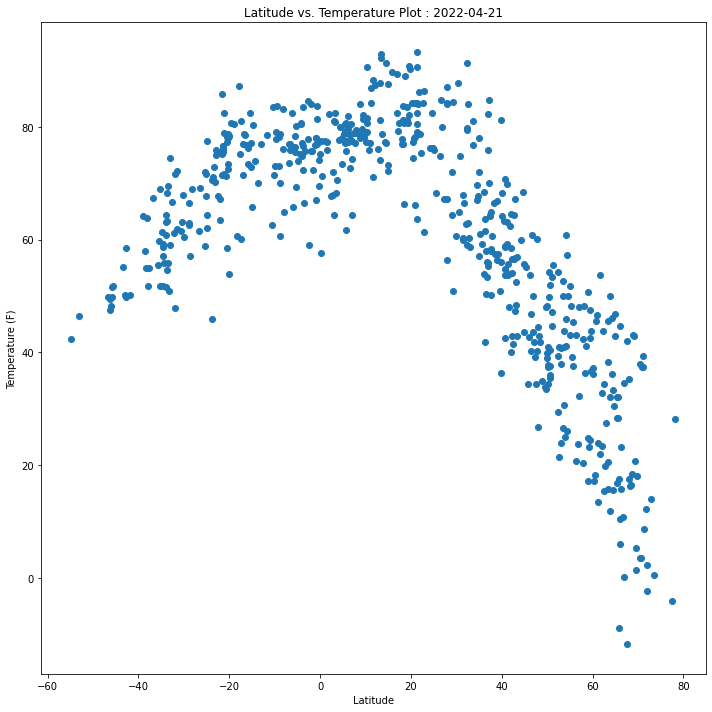

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Latitude vs. Temperature Plot : {date}")
plt.tight_layout()

plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

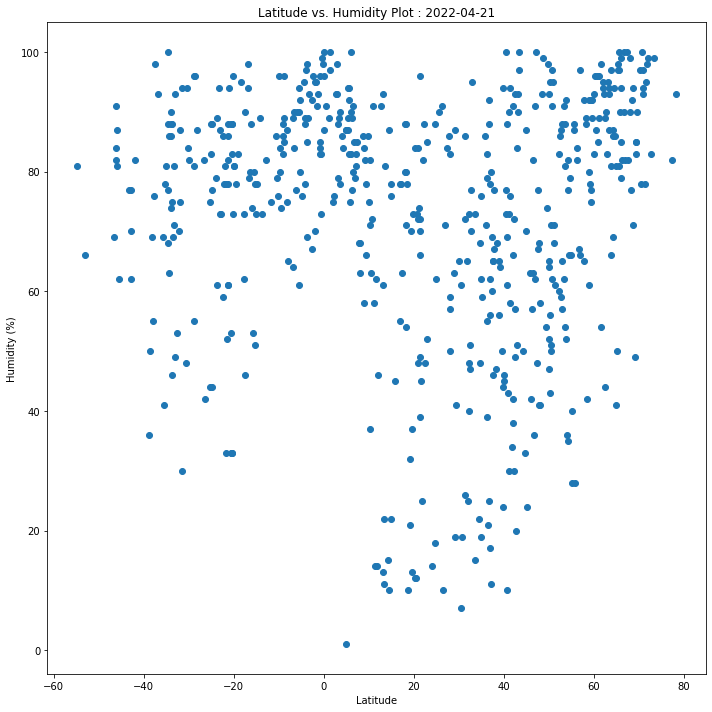

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs. Humidity Plot : {date}")
plt.tight_layout()

plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

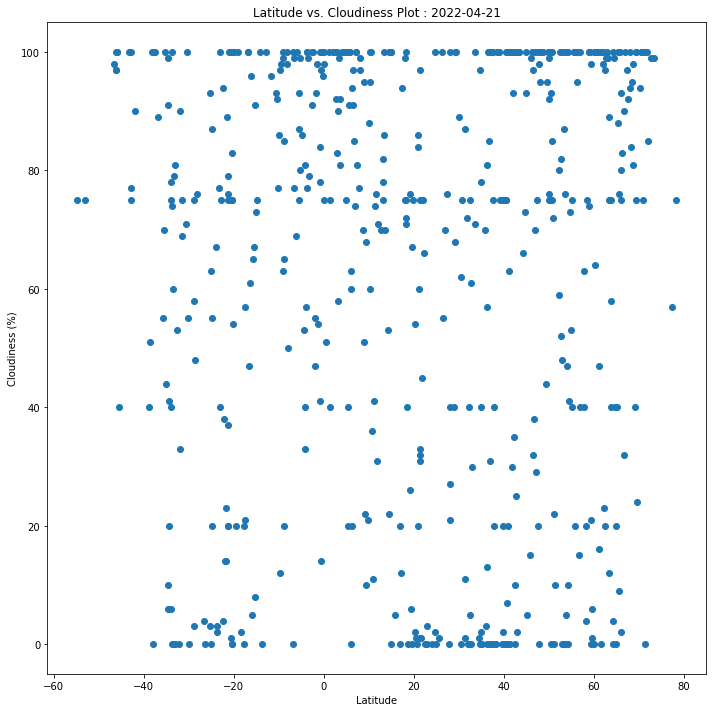

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs. Cloudiness Plot : {date}")
plt.tight_layout()

plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

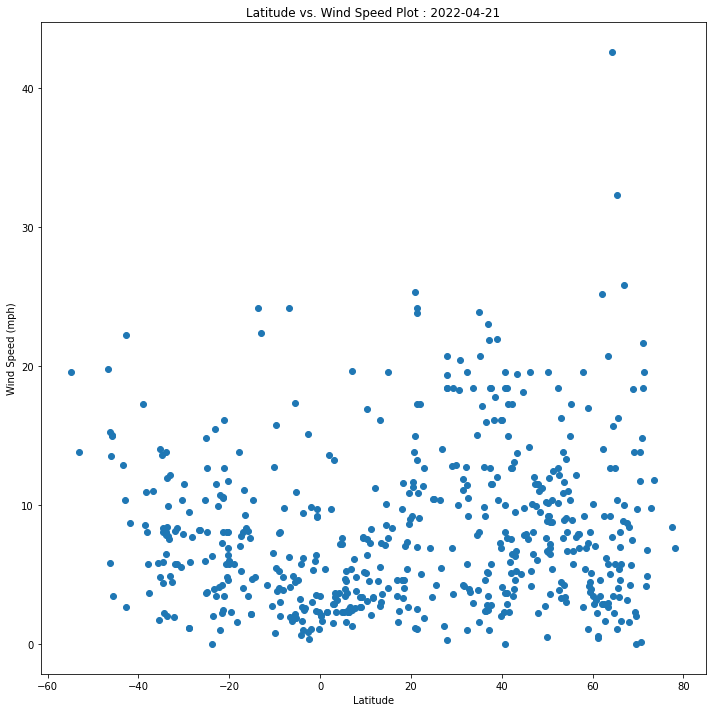

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs. Wind Speed Plot : {date}")
plt.tight_layout()

plt.show

## Linear Regression

In [13]:
nor_cit_dat = clean_city_data.loc[clean_city_data['Lat'] > 0]
sou_cit_dat = clean_city_data.loc[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

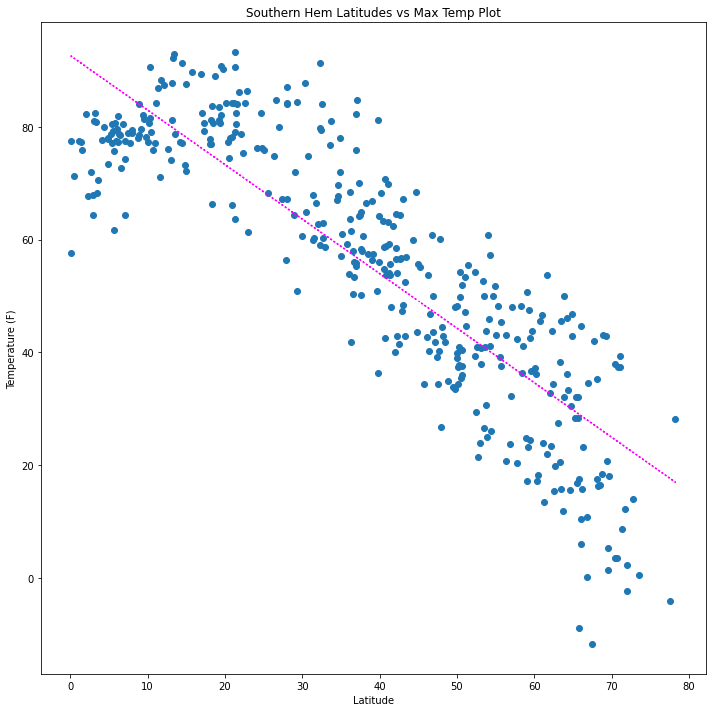

In [14]:
nh_mt_lat_slope, nh_mt_lat_int, nh_mt_lat_r, nh_mt_lat_p, nh_mt_lat_std_err = \
    linregress(nor_cit_dat["Lat"],nor_cit_dat["Max Temp"])
nh_mt_lat_line = nh_mt_lat_slope * nor_cit_dat["Lat"] + nh_mt_lat_int

plt.figure(figsize=(10,10))
plt.scatter(nor_cit_dat["Lat"],nor_cit_dat["Max Temp"])
plt.plot(nor_cit_dat["Lat"],nh_mt_lat_line,color='#FF00FF',linestyle=":")

plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hem Latitudes vs Max Temp Plot")
plt.tight_layout()

plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

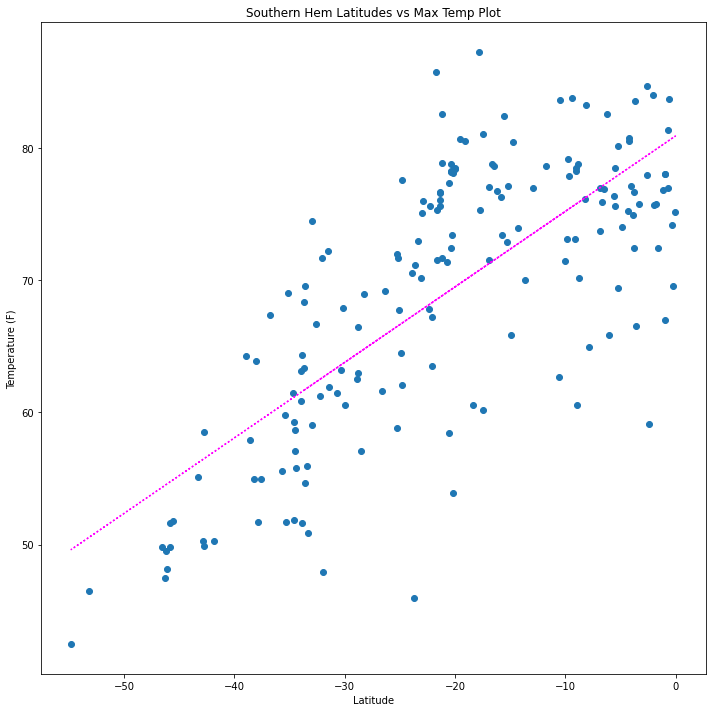

In [15]:
sh_mt_lat_slope, sh_mt_lat_int, sh_mt_lat_r, sh_mt_lat_p, sh_mt_lat_std_err = \
    linregress(sou_cit_dat["Lat"],sou_cit_dat["Max Temp"])
sh_mt_lat_line = sh_mt_lat_slope * sou_cit_dat["Lat"] + sh_mt_lat_int

plt.figure(figsize=(10,10))
plt.scatter(sou_cit_dat["Lat"],sou_cit_dat["Max Temp"])
plt.plot(sou_cit_dat["Lat"],sh_mt_lat_line,color='#FF00FF',linestyle=":")

plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Southern Hem Latitudes vs Max Temp Plot")
plt.tight_layout()

plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

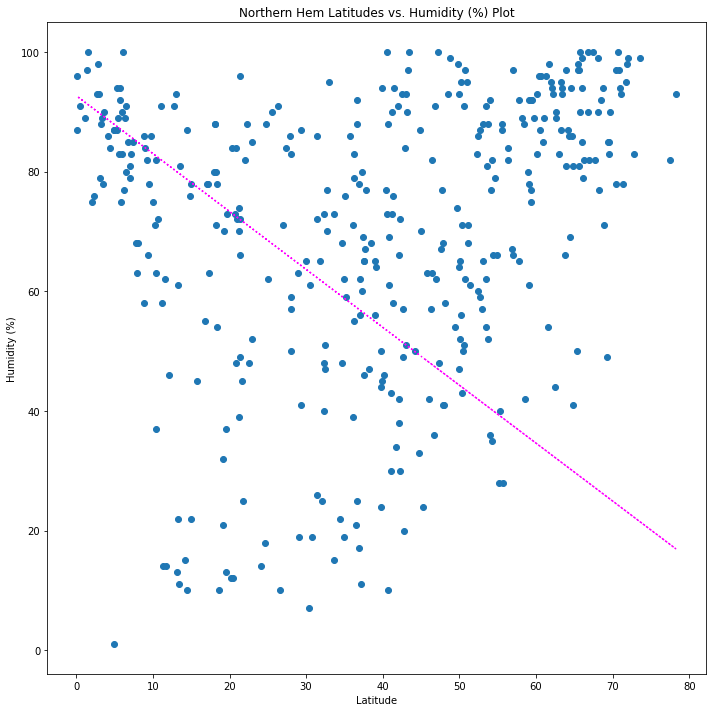

In [16]:
nh_h_lat_slope, nh_h_lat_int, nh_h_lat_r, nh_h_lat_p, nh_h_lat_std_err = \
    linregress(nor_cit_dat["Lat"],nor_cit_dat["Humidity"])
nh_h_lat_line = nh_h_lat_slope * nor_cit_dat["Lat"] + nh_h_lat_int

plt.figure(figsize=(10,10))
plt.scatter(nor_cit_dat["Lat"],nor_cit_dat["Humidity"])
plt.plot(nor_cit_dat["Lat"],nh_mt_lat_line,color='#FF00FF',linestyle=":")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hem Latitudes vs. Humidity (%) Plot")
plt.tight_layout()

plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

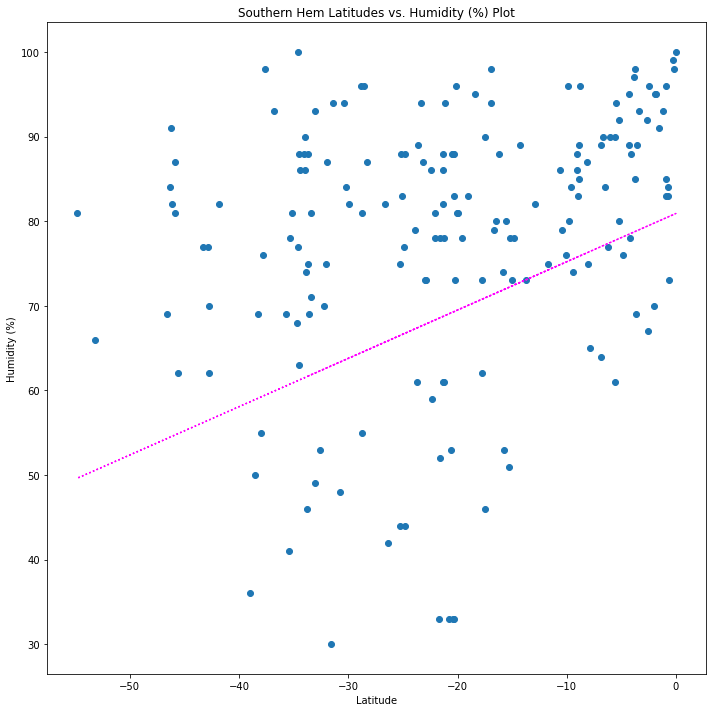

In [17]:
sh_h_lat_slope, sh_h_lat_int, sh_h_lat_r, sh_h_lat_p, sh_h_lat_std_err = \
    linregress(sou_cit_dat["Lat"],sou_cit_dat["Humidity"])
sh_h_lat_line = sh_h_lat_slope * sou_cit_dat["Lat"] + sh_h_lat_int

plt.figure(figsize=(10,10))
plt.scatter(sou_cit_dat["Lat"],sou_cit_dat["Humidity"])
plt.plot(sou_cit_dat["Lat"],sh_mt_lat_line,color='#FF00FF',linestyle=":")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hem Latitudes vs. Humidity (%) Plot")
plt.tight_layout()

plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

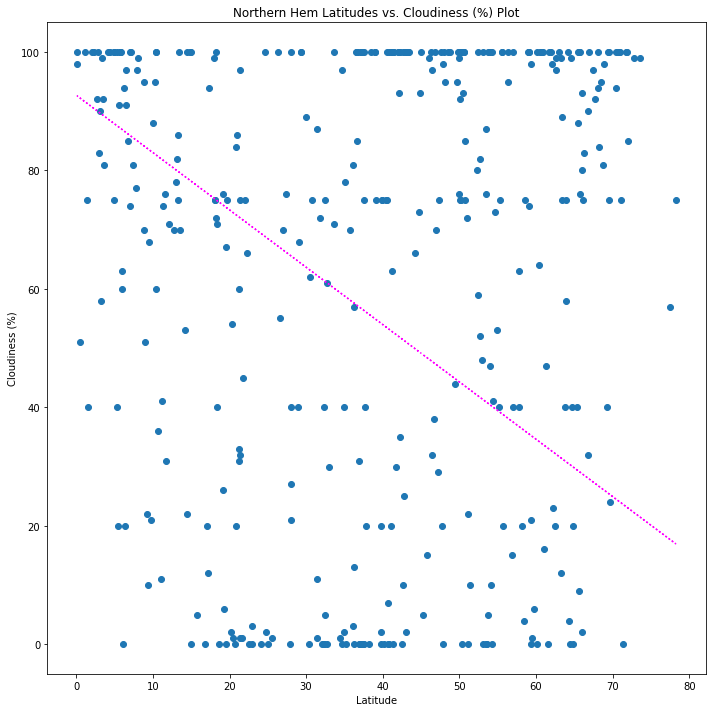

In [18]:
nh_c_lat_slope, nh_c_lat_int, nh_c_lat_r, nh_c_lat_p, nh_c_lat_std_err = \
    linregress(nor_cit_dat["Lat"],nor_cit_dat["Cloudiness"])
nh_c_lat_line = nh_c_lat_slope * nor_cit_dat["Lat"] + nh_c_lat_int

plt.figure(figsize=(10,10))
plt.scatter(nor_cit_dat["Lat"],nor_cit_dat["Cloudiness"])
plt.plot(nor_cit_dat["Lat"],nh_mt_lat_line,color='#FF00FF',linestyle=":")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hem Latitudes vs. Cloudiness (%) Plot")
plt.tight_layout()

plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

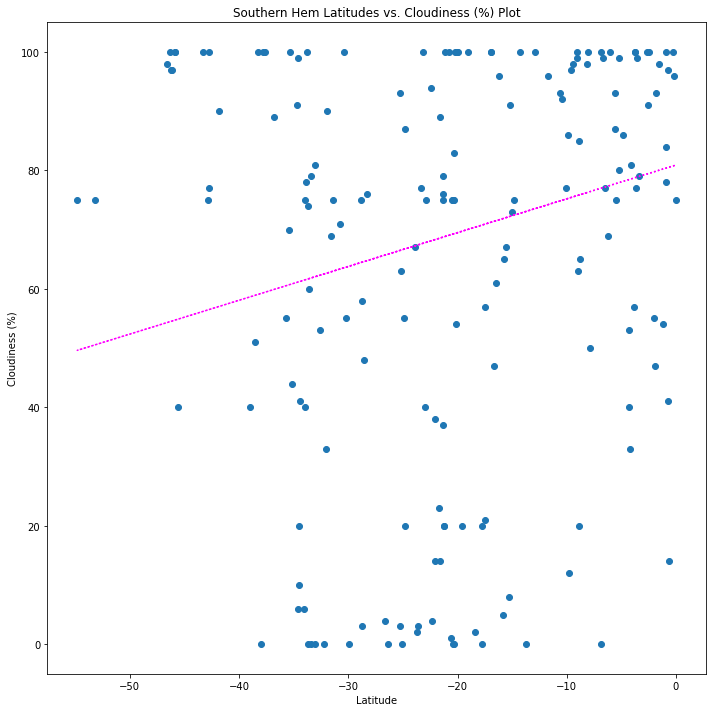

In [19]:
sh_c_lat_slope, sh_c_lat_int, sh_c_lat_r, sh_c_lat_p, sh_c_lat_std_err = \
    linregress(sou_cit_dat["Lat"],sou_cit_dat["Cloudiness"])
sh_c_lat_line = sh_c_lat_slope * sou_cit_dat["Lat"] + sh_c_lat_int

plt.figure(figsize=(10,10))
plt.scatter(sou_cit_dat["Lat"],sou_cit_dat["Cloudiness"])
plt.plot(sou_cit_dat["Lat"],sh_mt_lat_line,color='#FF00FF',linestyle=":")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hem Latitudes vs. Cloudiness (%) Plot")
plt.tight_layout()

plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

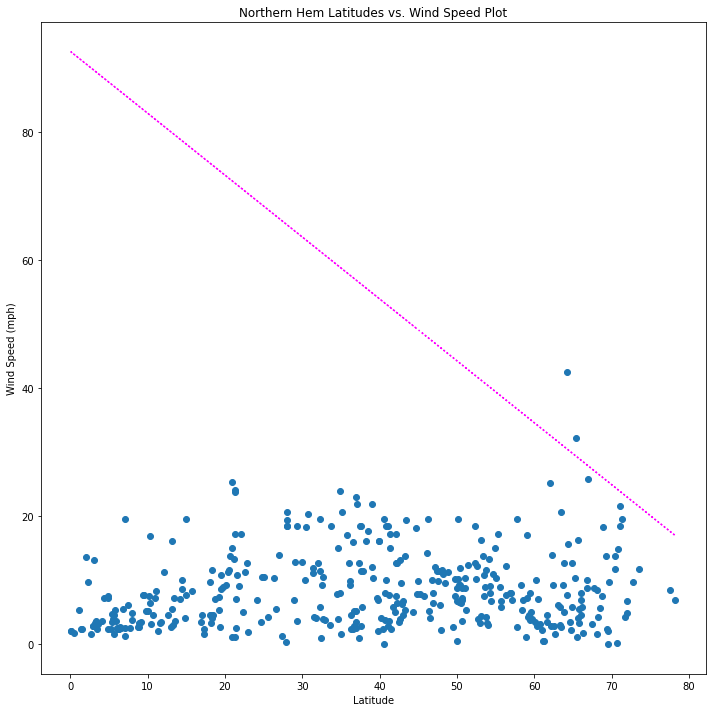

In [20]:
nh_ws_lat_slope, nh_ws_lat_int, nh_ws_lat_r, nh_ws_lat_p, nh_ws_lat_std_err = \
    linregress(nor_cit_dat["Lat"],nor_cit_dat["Wind Speed"])
nh_ws_lat_line = nh_ws_lat_slope * nor_cit_dat["Lat"] + nh_ws_lat_int

plt.figure(figsize=(10,10))
plt.scatter(nor_cit_dat["Lat"],nor_cit_dat["Wind Speed"])
plt.plot(nor_cit_dat["Lat"],nh_mt_lat_line,color='#FF00FF',linestyle=":")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hem Latitudes vs. Wind Speed Plot")
plt.tight_layout()

plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

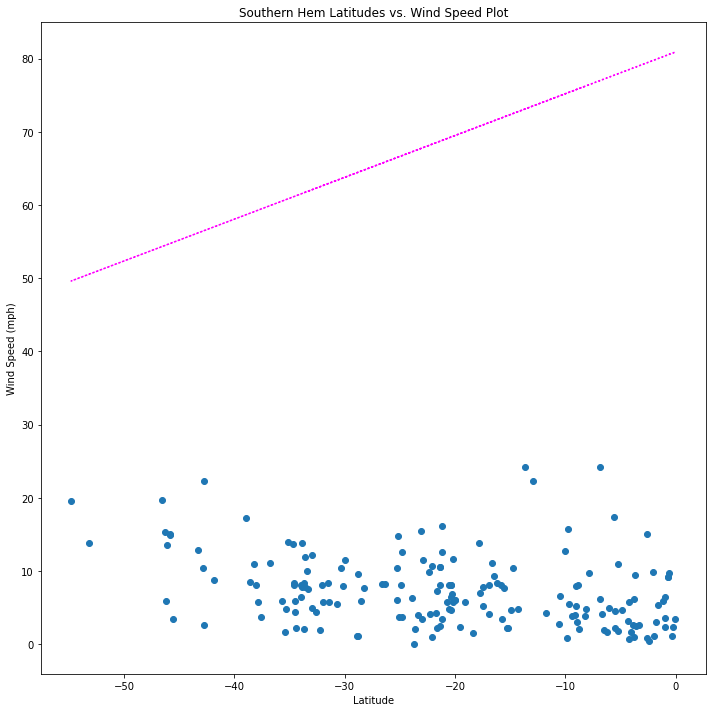

In [21]:
sh_ws_lat_slope, sh_ws_lat_int, sh_ws_lat_r, sh_ws_lat_p, sh_ws_lat_std_err = \
    linregress(sou_cit_dat["Lat"],sou_cit_dat["Wind Speed"])
sh_ws_lat_line = sh_ws_lat_slope * sou_cit_dat["Lat"] + sh_ws_lat_int

plt.figure(figsize=(10,10))
plt.scatter(sou_cit_dat["Lat"],sou_cit_dat["Wind Speed"])
plt.plot(sou_cit_dat["Lat"],sh_mt_lat_line,color='#FF00FF',linestyle=":")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hem Latitudes vs. Wind Speed Plot")
plt.tight_layout()

plt.show